In [110]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
# read and save the data as dt
dt = pd.read_csv("../data/data.txt", header=None)
dt.head()

,0
0,[WED] [JAN] [False] [180] 1-1-1800
1,[THU] [JAN] [False] [180] 1-1-1801
2,[FRI] [JAN] [False] [180] 1-1-1802
3,[SAT] [JAN] [False] [180] 1-1-1803
4,[SUN] [JAN] [True] [180] 1-1-1804


In [112]:
month_dict = {"[JAN]": 1,
              "[FEB]": 2,
              "[MAR]": 3,
              "[APR]": 4,
              "[MAY]": 5,
              "[JUN]": 6,
              "[JUL]": 7,
              "[AUG]": 8,
              "[SEP]": 9,
              "[OCT]": 10,
              "[NOV]": 11,
              "[DEC]": 12}

weekday_dict = {"[MON]": 0,
                "[TUE]": 1,
                "[WED]": 2,
                "[THU]": 3,
                "[FRI]": 4,
                "[SAT]": 5,
                "[SUN]": 6}

# def leap(decade):
#     '''this function is to find the leap years in a given decade'''
    
#     decade_sum_digits = int(decade)
#     leap_list = []
#     for i in range(10):
#         year = decade_sum_digits+i
#         if year%4==0:
#             if year%100==0:
#                 if year%400==0:
#                     leap_list +=[i]
#             else: 
#                 leap_list += [i]
#     return leap_list

# df["leap_years"] = [leap(row.split()[3].strip("[]")) for row in dt[0]]
# df["days"] = [[i if .weekday()==weekday_dict[row.split()[0]] for i in range(1,calendar.monthrange(year, month)[1])] for row in dt[0]]
# calendar.monthrange(year, month)[1]

In [143]:
# splitting every line to columns and modify some columns shape
df = pd.DataFrame()
# df["weekday_name"] = [weekday_dict[row.split()[0]] for row in dt[0]]
df["weekday_name"] = [weekday_dict[row.split()[0]] for row in dt[0]]
df["month"] = [month_dict[row.split()[1]] for row in dt[0]]
df["leap_year_condition"] = [0 if row.split()[2]=="[False]" else 1 for row in dt[0]]
df["decade"] = [int(row.split()[3].strip("[]")) for row in dt[0]]
df["output"] = [row.split()[4].strip("[]") for row in dt[0]]
df["output_year"] = [row.split()[4].strip("[]")[-1] for row in dt[0]]
df["output_day"] = [row.split()[4].strip("[]")[0] for row in dt[0]]
df.head(7)


,weekday_name,month,leap_year_condition,decade,output,output_year,output_day
0,2,1,0,180,1-1-1800,0,1
1,3,1,0,180,1-1-1801,1,1
2,4,1,0,180,1-1-1802,2,1
3,5,1,0,180,1-1-1803,3,1
4,6,1,1,180,1-1-1804,4,1
5,1,1,0,180,1-1-1805,5,1
6,2,1,0,180,1-1-1806,6,1


In [145]:
# df = pd.get_dummies(df, columns=["weekday_name"], prefix="weekday")
# df.head()

**Exploratory Data Analysis**

- **the data is already normalized**

In [130]:
df.isna().sum()

weekday_name           0
month                  0
leap_year_condition    0
decade                 0
output                 0
target_year            0
target_day             0
dtype: int64

- **there is no null values to impute**

In [131]:
df.dtypes

weekday_name           object
month                   int64
leap_year_condition     int64
decade                  int64
output                 object
target_year            object
target_day             object
dtype: object

In [132]:
df.shape

(146462, 7)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146462 entries, 0 to 146461
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   weekday_name         146462 non-null  object
 1   month                146462 non-null  int64 
 2   leap_year_condition  146462 non-null  int64 
 3   decade               146462 non-null  int64 
 4   output               146462 non-null  object
 5   target_year          146462 non-null  object
 6   target_day           146462 non-null  object
dtypes: int64(3), object(4)
memory usage: 7.8+ MB


In [134]:
df.describe()

,month,leap_year_condition,decade
count,146462.000000,146462.000000,146462.000000
mean,6.523030,0.242397,199.551146
std,3.448687,0.428535,11.574208
min,1.000000,0.000000,180.000000
25%,4.000000,0.000000,190.000000
50%,7.000000,0.000000,200.000000
75%,10.000000,0.000000,210.000000
max,12.000000,1.000000,220.000000


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

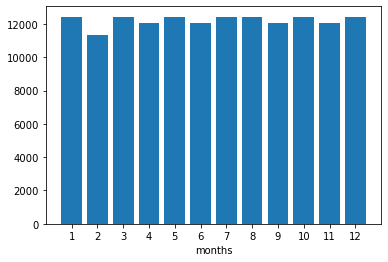

In [135]:
plt.bar(df.month.value_counts().index, df.month.value_counts())
plt.xlabel("months")
plt.xticks(list(range(1, 13)))
list(range(1, 13))

**the months distribution is balanced**

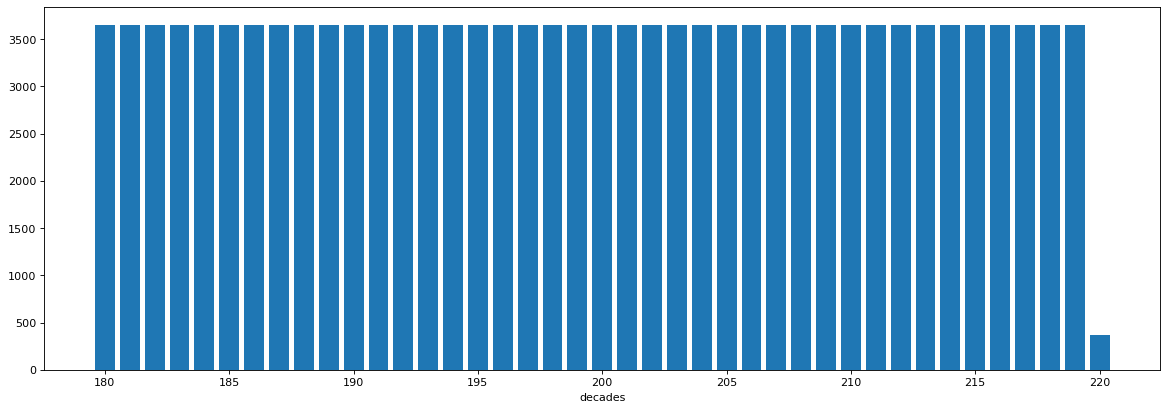

In [136]:
from matplotlib.pyplot import figure #https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
figure(figsize=(18, 6), dpi=80)
plt.bar(df.decade.value_counts().index, df.decade.value_counts())
plt.xlabel("decades")
plt.show()
# plt.xticks((df.decade.nunique()))

**data of decades is ideally balanced except for "220" decade**

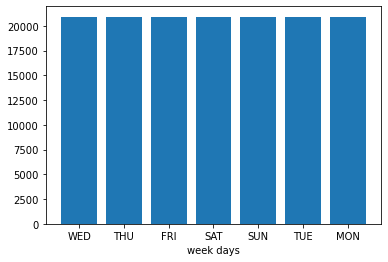

In [137]:
plt.bar(df.weekday_name.value_counts().index, df.weekday_name.value_counts())
plt.xlabel("week days")
plt.show()

**also the weekdays distribution is ideally balanced**

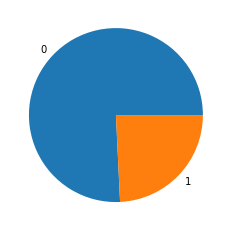

In [138]:
plt.pie(df["leap_year_condition"].value_counts(), labels=df["leap_year_condition"].value_counts().index)
plt.show()

**also non leap years is three times number of leap years**

In [144]:
df.to_csv("../data/data.csv", header=True, index=False)